In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

In [2]:
# Load our data set
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value

In [3]:
#Function to calculate the cost
def compute_cost(x, y, w, b):

    m = x.shape[0]
    cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [4]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      x (ndarray (m,)): Data, m examples
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b
     """
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range (m):
        f_wb = x[i] * w + b
        dj_dw += (f_wb - y[i])*x[i]
        dj_db += (f_wb - y[i])
    dj_dw /= 2 * m
    dj_db /= 2 * m
    return dj_dw, dj_db

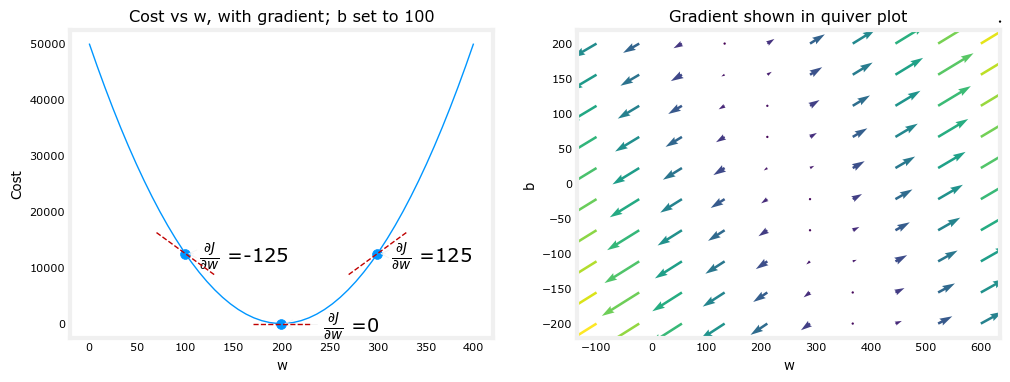

In [5]:
plt_gradients(x_train,y_train, compute_cost, compute_gradient)
plt.show()

In [6]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking
    num_iters gradient steps with learning rate alpha

    Args:
      x (ndarray (m,))  : Data, m examples
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient

    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b]
      """
    w = copy.deepcopy(w_in) #Avoid modifying the global w_in you input
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range (num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)
        #Update the parameters
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        #Save J at each iteration
        if i < 100000:
            J_history.append(compute_cost(x, y, w, b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")

    return w, b, J_history, p_history #return w and J,w history for graphing

In [7]:
#Initialise params
w_init = 0
b_init = 0
#GD Setup
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 8.21e+04  dj_dw: -3.250e+02, dj_db: -2.000e+02   w:  3.250e+00, b: 2.00000e+00
Iteration 1000: Cost 7.09e+00  dj_dw: -2.674e-01, dj_db:  4.326e-01   w:  1.927e+02, b: 1.11856e+02
Iteration 2000: Cost 3.42e+00  dj_dw: -1.856e-01, dj_db:  3.004e-01   w:  1.949e+02, b: 1.08232e+02
Iteration 3000: Cost 1.65e+00  dj_dw: -1.289e-01, dj_db:  2.086e-01   w:  1.965e+02, b: 1.05716e+02
Iteration 4000: Cost 7.94e-01  dj_dw: -8.950e-02, dj_db:  1.448e-01   w:  1.975e+02, b: 1.03969e+02
Iteration 5000: Cost 3.83e-01  dj_dw: -6.214e-02, dj_db:  1.005e-01   w:  1.983e+02, b: 1.02756e+02
Iteration 6000: Cost 1.85e-01  dj_dw: -4.314e-02, dj_db:  6.981e-02   w:  1.988e+02, b: 1.01913e+02
Iteration 7000: Cost 8.90e-02  dj_dw: -2.996e-02, dj_db:  4.847e-02   w:  1.992e+02, b: 1.01328e+02
Iteration 8000: Cost 4.29e-02  dj_dw: -2.080e-02, dj_db:  3.365e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 9000: Cost 2.07e-02  dj_dw: -1.444e-02, dj_db:  2.337e-02   w:  1.996e+02, b: 1.00640e+02


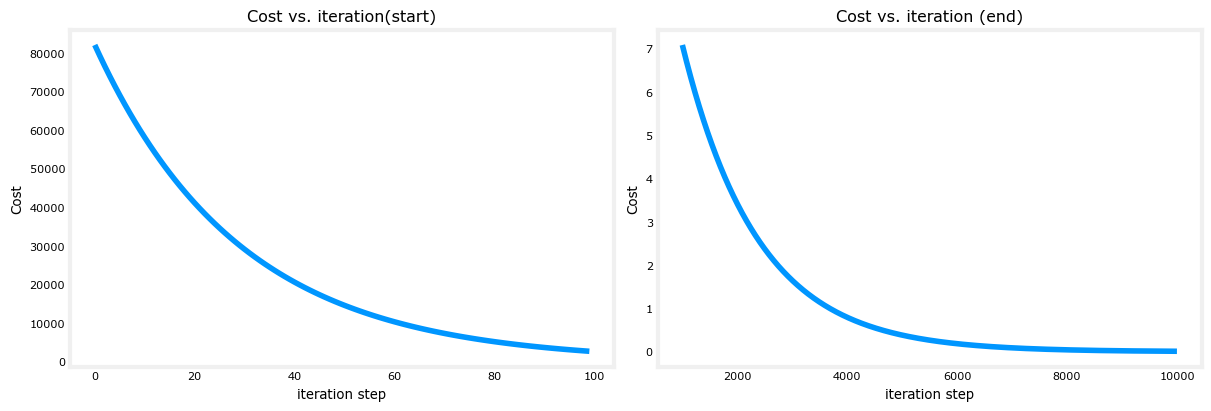

In [8]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step')
plt.show()

In [9]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.2 Thousand dollars
1200 sqft house prediction 340.1 Thousand dollars
2000 sqft house prediction 499.9 Thousand dollars


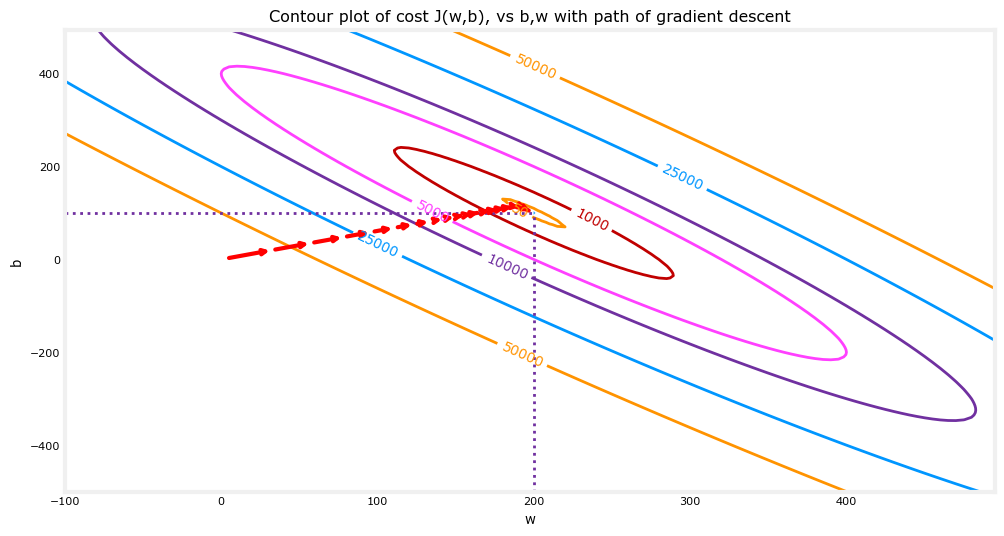

In [10]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, p_hist, ax)

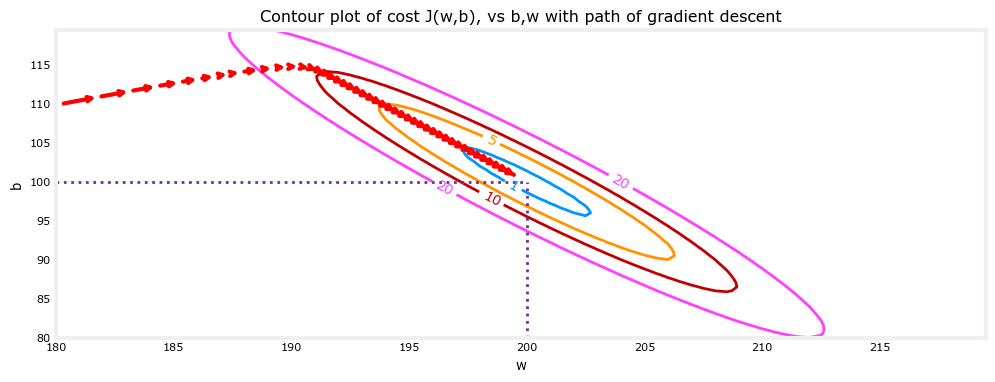

In [11]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_wgrad(x_train, y_train, p_hist, ax, w_range=[180, 220, 0.5], b_range=[80, 120, 0.5],
            contours=[1,5,10,20],resolution=0.5)

In [12]:
# initialize parameters
w_init = 0
b_init = 0
# set alpha to a large value
iterations = 10
tmp_alpha = 8.0e-1
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)

Iteration    0: Cost 1.17e+04  dj_dw: -3.250e+02, dj_db: -2.000e+02   w:  2.600e+02, b: 1.60000e+02
Iteration    1: Cost 1.62e+03  dj_dw:  1.200e+02, dj_db:  7.500e+01   w:  1.640e+02, b: 1.00000e+02
Iteration    2: Cost 2.33e+02  dj_dw: -4.500e+01, dj_db: -2.700e+01   w:  2.000e+02, b: 1.21600e+02
Iteration    3: Cost 4.20e+01  dj_dw:  1.620e+01, dj_db:  1.080e+01   w:  1.870e+02, b: 1.12960e+02
Iteration    4: Cost 1.51e+01  dj_dw: -6.480e+00, dj_db: -3.240e+00   w:  1.922e+02, b: 1.15552e+02
Iteration    5: Cost 1.09e+01  dj_dw:  1.944e+00, dj_db:  1.944e+00   w:  1.907e+02, b: 1.13997e+02
Iteration    6: Cost 9.80e+00  dj_dw: -1.166e+00, dj_db:  0.000e+00   w:  1.916e+02, b: 1.13997e+02
Iteration    7: Cost 9.17e+00  dj_dw:  1.421e-14, dj_db:  6.998e-01   w:  1.916e+02, b: 1.13437e+02
Iteration    8: Cost 8.63e+00  dj_dw: -4.199e-01, dj_db:  4.199e-01   w:  1.919e+02, b: 1.13101e+02
Iteration    9: Cost 8.13e+00  dj_dw: -2.519e-01, dj_db:  5.039e-01   w:  1.921e+02, b: 1.12698e+02


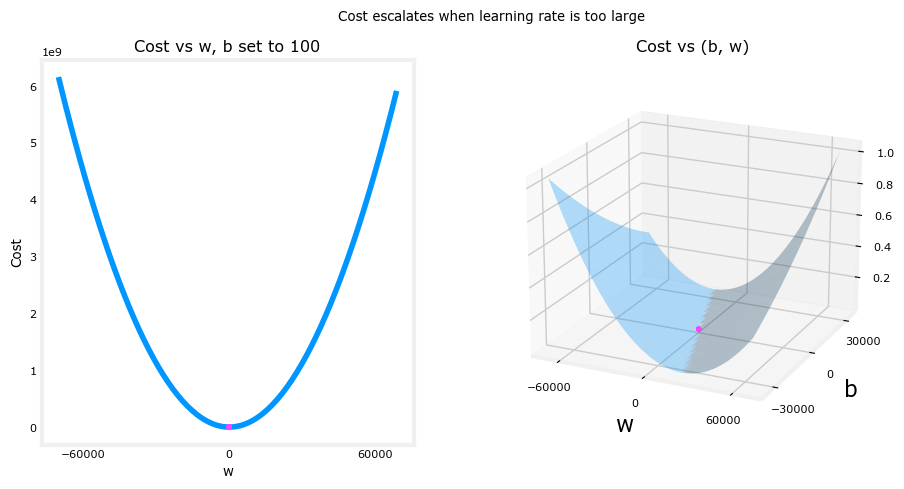

In [13]:
plt_divergence(p_hist, J_hist,x_train, y_train)
plt.show()